In [66]:
# Include this line to make plots interactive
%matplotlib notebook

In [67]:
import warnings
warnings.filterwarnings('ignore')
import requests 
import json
import pandas as pd
import numpy as np
from scipy import stats
from sodapy import Socrata
import matplotlib.pyplot as plt
%matplotlib inline
import gmaps
from pandas.io.json import json_normalize

#set ggplot style
plt.style.use('ggplot')


In [68]:
client = Socrata("chronicdata.cdc.gov", None)
url = "https://chronicdata.cdc.gov/resource/rb39-ixr6.json"
results = client.get("rb39-ixr6", limit=38708)

In [69]:
#results

In [70]:
#print(requests.get(url))

In [71]:
#print(requests.get(url).json())

In [72]:
#response = requests.get(url).json()
#print(json.dumps(response, indent = 4, sort_keys=True))
#marked out due to API stuff discussed with Brent

In [73]:
health_df = pd.DataFrame(results)
health_df.count()

:@computed_region_bxsw_vy29    37220
:@computed_region_he4y_prf8    37750
age                            38708
data_value                     24275
data_value_footnote            14433
data_value_footnote_symbol     14433
data_value_std_err             24275
data_value_type                38708
data_value_unit                38708
datasource                     38708
displayorder                   38708
education                      38708
gender                         38708
geolocation                    38708
high_confidence_limit          24275
locationabbr                   38708
locationdesc                   38708
low_confidence_limit           24275
measuredesc                    38708
measureid                      38708
race                           38708
response                       38708
sample_size                    24275
stratificationid1              38708
stratificationid2              38708
stratificationid3              38708
stratificationid4              38708
s

In [74]:
#Collecting a list of all columns within the DataFrame/
health_df.columns

Index([':@computed_region_bxsw_vy29', ':@computed_region_he4y_prf8', 'age',
       'data_value', 'data_value_footnote', 'data_value_footnote_symbol',
       'data_value_std_err', 'data_value_type', 'data_value_unit',
       'datasource', 'displayorder', 'education', 'gender', 'geolocation',
       'high_confidence_limit', 'locationabbr', 'locationdesc',
       'low_confidence_limit', 'measuredesc', 'measureid', 'race', 'response',
       'sample_size', 'stratificationid1', 'stratificationid2',
       'stratificationid3', 'stratificationid4', 'submeasure', 'submeasureid',
       'topicdesc', 'topicid', 'topictype', 'topictypeid', 'year'],
      dtype='object')

In [75]:
#Reorganizing the columns using double brackets
organized_df = health_df[["locationabbr","year","locationdesc","topicdesc","measuredesc","submeasure","data_value","sample_size","gender","age","race","response","education", "geolocation"]]
organized_df.head()

,locationabbr,year,locationdesc,topicdesc,measuredesc,submeasure,data_value,sample_size,gender,age,race,response,education,geolocation
0,KS,2011,Kansas,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.5,1080,Overall,All Ages,White,Ever,High School,"{'type': 'Point', 'coordinates': [-98.20078122..."
1,WY,1999,Wyoming,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,34.6,747,Male,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."
2,DE,2009,Delaware,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.3,1791,Female,All Ages,All Races,Current,Middle School,"{'type': 'Point', 'coordinates': [-75.57774116..."
3,WY,1995,Wyoming,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,19.6,798,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."
4,WY,2013,Wyoming,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,4.9,2183,Overall,All Ages,White,Frequent,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."


In [76]:
renamed_df = organized_df.rename(columns={"locationabbr":"Location Code","year":"Year","locationdesc":"State","topicdesc":"Use Type","measuredesc":"Status","submeasure":"Frequency","data_value":"% of Users","sample_size":"Sample Size","gender":"Gender","age":"Age","race":"Race","response":"User Status","education":"Education"})
renamed_df.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
0,KS,2011,Kansas,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.5,1080,Overall,All Ages,White,Ever,High School,"{'type': 'Point', 'coordinates': [-98.20078122..."
1,WY,1999,Wyoming,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,34.6,747,Male,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."
2,DE,2009,Delaware,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.3,1791,Female,All Ages,All Races,Current,Middle School,"{'type': 'Point', 'coordinates': [-75.57774116..."
3,WY,1995,Wyoming,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,19.6,798,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."
4,WY,2013,Wyoming,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,4.9,2183,Overall,All Ages,White,Frequent,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."


In [77]:
Minus_Nat= renamed_df.loc[renamed_df["State"] !="National (States and DC)"]
Minus_PR = Minus_Nat.loc[Minus_Nat["State"] !="Puerto Rico"]
Minus_NatPRGuam = Minus_PR.loc[Minus_PR["State"] !="Guam"]
Minus_NatPRGuam.head()
#Minus_Ohio['C'] = np.arange(len(Minus_Ohio))
#print (Minus_Ohio)

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
0,KS,2011,Kansas,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.5,1080,Overall,All Ages,White,Ever,High School,"{'type': 'Point', 'coordinates': [-98.20078122..."
1,WY,1999,Wyoming,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,34.6,747,Male,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."
2,DE,2009,Delaware,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.3,1791,Female,All Ages,All Races,Current,Middle School,"{'type': 'Point', 'coordinates': [-75.57774116..."
3,WY,1995,Wyoming,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,19.6,798,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."
4,WY,2013,Wyoming,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,4.9,2183,Overall,All Ages,White,Frequent,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."


In [78]:
USA=Minus_NatPRGuam.dropna(how='any')
USA.head()
#USA.count()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
0,KS,2011,Kansas,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.5,1080,Overall,All Ages,White,Ever,High School,"{'type': 'Point', 'coordinates': [-98.20078122..."
1,WY,1999,Wyoming,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,34.6,747,Male,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."
2,DE,2009,Delaware,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.3,1791,Female,All Ages,All Races,Current,Middle School,"{'type': 'Point', 'coordinates': [-75.57774116..."
3,WY,1995,Wyoming,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,19.6,798,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."
4,WY,2013,Wyoming,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,4.9,2183,Overall,All Ages,White,Frequent,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."


In [79]:
USA[['% of Users']]=USA[['% of Users']].astype(float)

In [80]:
# Finding Average & Using GroupBy in order to separate the data into fields according to "Year and "Gender" values
grouped_usa_df = USA.groupby(['Year','Gender']).mean()

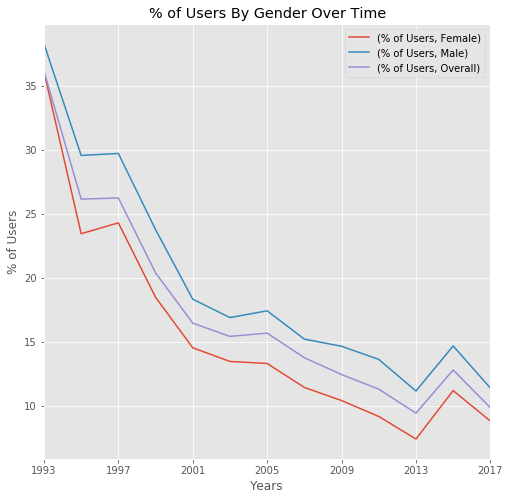

In [81]:

# Use unstack() to Plot all users response as a line chart

fig, ax = plt.subplots(figsize=(8,8))
grouped_usa_df.unstack().plot(ax=ax)
plt.title("% of Users By Gender Over Time")
plt.xlabel("Years")
plt.ylabel("% of Users")
leg = ax.legend()







In [82]:
#Forming DataFrame for Just E-Cigarette User Responses over USA
USA_eCig=USA.loc[USA["Use Type"] ==("E-Cigarette Use (Youth)")]
USA_eCig.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
41,NC,2015,North Carolina,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,63.0,429,Overall,All Ages,Multiple Race,Ever,High School,"{'type': 'Point', 'coordinates': [-79.15925046..."
61,FL,2015,Florida,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,9.9,5752,Overall,All Ages,All Races,Current,Middle School,"{'type': 'Point', 'coordinates': [-81.92896053..."
89,NY,2015,New York,E-Cigarette Use (Youth),User Status,Frequent E-Cigarette User,4.8,2095,Overall,All Ages,White,Frequent,High School,"{'type': 'Point', 'coordinates': [-75.54397042..."
107,VT,2015,Vermont,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,7.4,362,Overall,All Ages,African American,Ever,Middle School,"{'type': 'Point', 'coordinates': [-72.51764079..."
133,VT,2015,Vermont,E-Cigarette Use (Youth),User Status,Frequent E-Cigarette User,0.8,365,Overall,All Ages,African American,Frequent,Middle School,"{'type': 'Point', 'coordinates': [-72.51764079..."


In [83]:
# Finding Average & Using GroupBy in order to separate the data into fields according to "Year and "Gender" values
USA_eCig_Avg = USA_eCig.groupby(['Year','Gender']).mean()
USA_eCig_Avg.head()

% of Users
Year Gender             
2015 Female    17.653285
     Male      20.639416
     Overall   18.693457
2017 Female    14.561842
     Male      17.178947

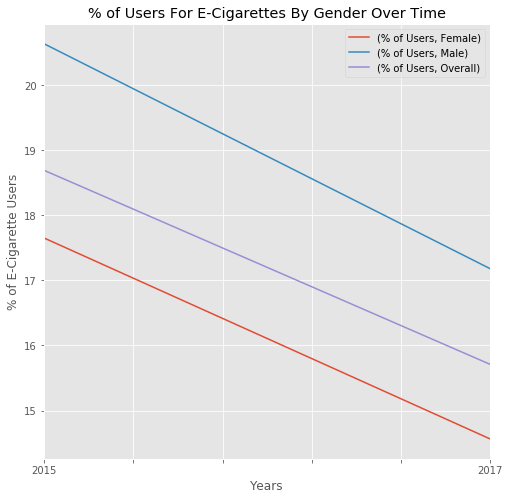

In [84]:
# Use unstack() to Plot the E-Cigarette users response as a line chart

fig, ax = plt.subplots(figsize=(8,8))
USA_eCig_Avg.unstack().plot(ax=ax)
plt.title("% of Users For E-Cigarettes By Gender Over Time")
plt.xlabel("Years")
plt.ylabel("% of E-Cigarette Users")
leg = ax.legend()




In [85]:
grouped_usa_Ethinicity = USA.groupby(['Year','Race']).mean()

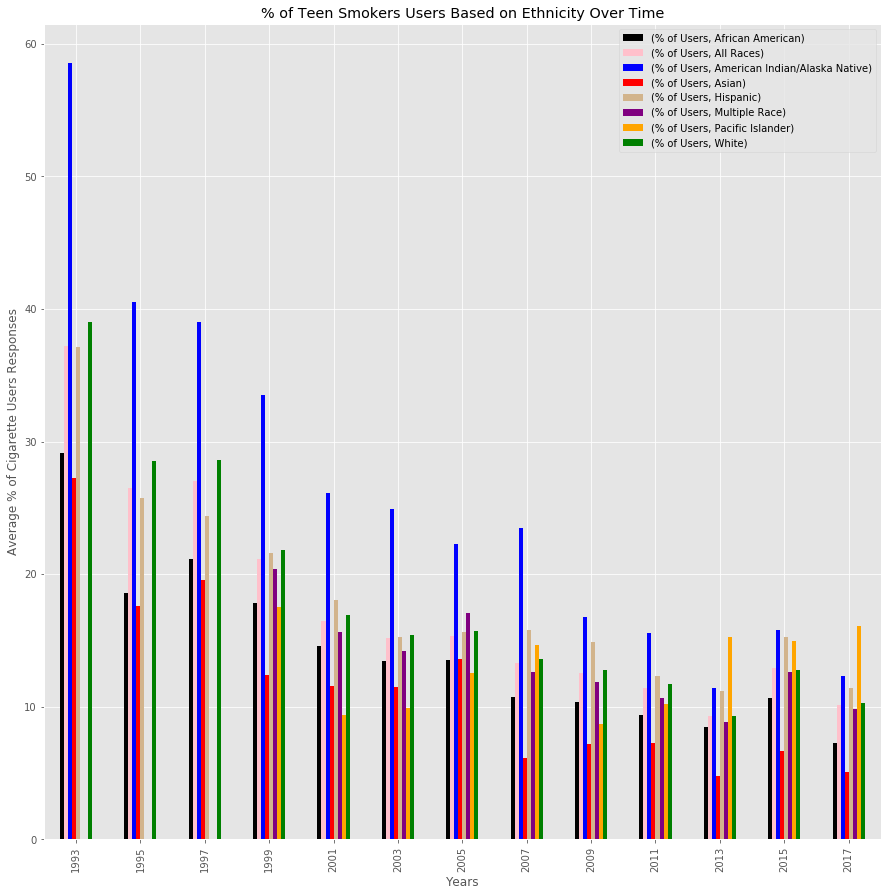

In [86]:
fig, ax = plt.subplots(figsize=(15,15))
colors = ["black","pink","blue","red","tan","purple","orange","green"]
grouped_usa_Ethinicity.unstack().plot.bar(ax=ax, color=colors)
plt.title("% of Teen Smokers Users Based on Ethnicity Over Time")
plt.xlabel("Years")
plt.ylabel("Average % of Cigarette Users Responses")
leg = ax.legend()

In [87]:
USA_eCig_Etinicity = USA_eCig.groupby(['Year','Race']).mean()

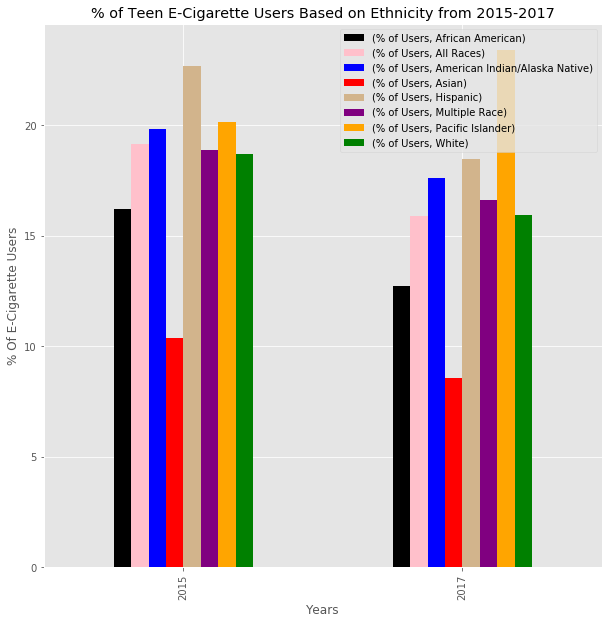

In [88]:
fig, ax = plt.subplots(figsize=(10,10))
colors = ["black","pink","blue","red","tan","purple","orange","green"]
USA_eCig_Etinicity.unstack().plot.bar(ax=ax, color= colors)
plt.title("% of Teen E-Cigarette Users Based on Ethnicity from 2015-2017")
plt.xlabel("Years")
plt.ylabel("% Of E-Cigarette Users")
leg = ax.legend()

In [89]:
grouped_usa_User_Status = USA.groupby(['Year','User Status']).mean()

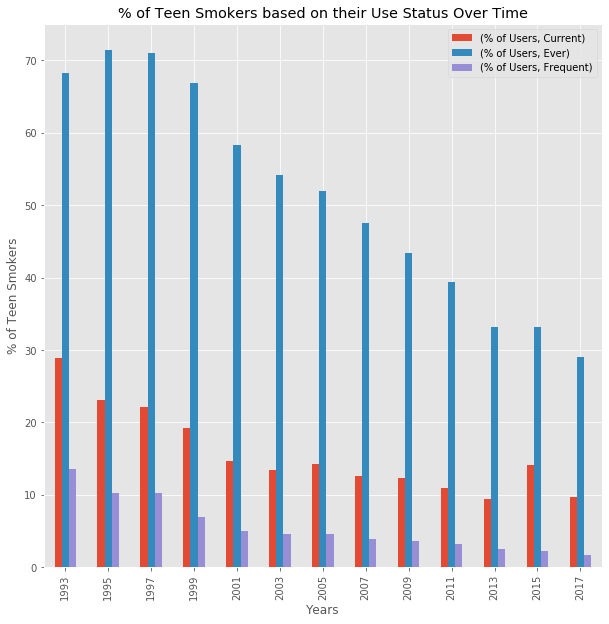

In [90]:
fig, ax = plt.subplots(figsize=(10,10))
grouped_usa_User_Status.unstack().plot.bar(ax=ax)
plt.title("% of Teen Smokers based on their Use Status Over Time")
plt.xlabel("Years")
plt.ylabel("% of Teen Smokers")
leg = ax.legend()

In [91]:
E_Cig_grouped_usa_User_Status = USA_eCig.groupby(['Year','User Status']).mean()

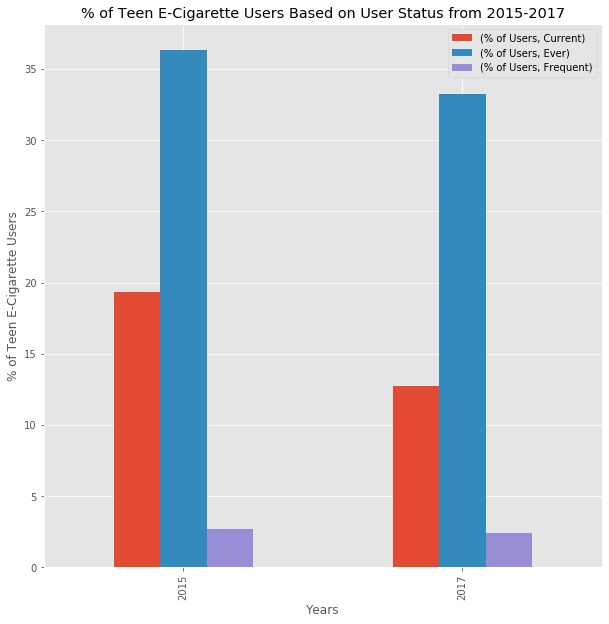

In [92]:
fig, ax = plt.subplots(figsize=(10,10))
E_Cig_grouped_usa_User_Status.unstack().plot.bar(ax=ax)
plt.title("% of Teen E-Cigarette Users Based on User Status from 2015-2017")
plt.xlabel("Years")
plt.ylabel("% of Teen E-Cigarette Users")
leg = ax.legend()

In [93]:
#Forming DataFrame for Just E-Cigarette User Responses over USA
USA_Use_type_grp=USA.groupby(['Year','Use Type']).mean()
USA_Use_type_grp.head()

% of Users
Year Use Type                                 
1993 Cigarette Use (Youth)           36.571579
1995 Cigarette Use (Youth)           37.818543
     Smokeless Tobacco Use (Youth)    7.964737
1997 Cigarette Use (Youth)           40.188418
     Smokeless Tobacco Use (Youth)    6.419583

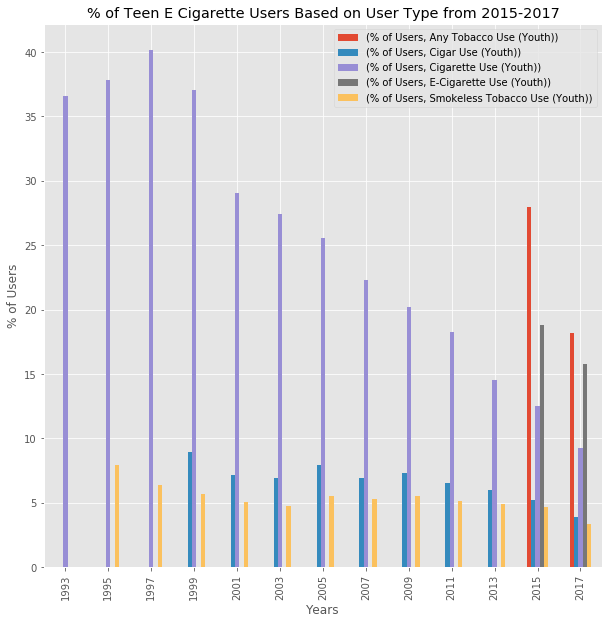

In [94]:
fig, ax = plt.subplots(figsize=(10,10))
USA_Use_type_grp.unstack().plot.bar(ax=ax)
plt.title("% of Teen E Cigarette Users Based on User Type from 2015-2017")
plt.xlabel("Years")
plt.ylabel("% of Users")
leg = ax.legend()

In [95]:
Avg_USA=USA[['% of Users']]=USA[['% of Users']].astype(float)

In [96]:
National= renamed_df.loc[renamed_df["State"] =="National (States and DC)"]
National.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
20991,US,2017,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,7.8,7389,Female,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21054,US,2017,National (States and DC),Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,0.4,638,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21076,US,2017,National (States and DC),Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,3.5,2737,Overall,All Ages,African American,Current,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21120,US,2017,National (States and DC),Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,1.1,3536,Overall,All Ages,Hispanic,Frequent,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21166,US,2017,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,0.3,633,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."


In [97]:
no_null_National =National.dropna(how='any')
no_null_National.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
20991,US,2017,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,7.8,7389,Female,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21054,US,2017,National (States and DC),Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,0.4,638,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21076,US,2017,National (States and DC),Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,3.5,2737,Overall,All Ages,African American,Current,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21120,US,2017,National (States and DC),Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,1.1,3536,Overall,All Ages,Hispanic,Frequent,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21166,US,2017,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,0.3,633,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."


In [98]:
Ohio_df= renamed_df.loc[renamed_df["State"] =="Ohio"]
Ohio_df.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
8,OH,2013,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,NaN,NaN,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
23,OH,2011,Ohio,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,Multiple Race,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
49,OH,2007,Ohio,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,9.8,2498,Overall,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
99,OH,2011,Ohio,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,40.7,358,Overall,All Ages,African American,Ever,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
142,OH,2013,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,3.2,329,Overall,All Ages,African American,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."


In [99]:
no_null_OH =Ohio_df.dropna(how='any')
no_null_OH.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
49,OH,2007,Ohio,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,9.8,2498,Overall,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
99,OH,2011,Ohio,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,40.7,358,Overall,All Ages,African American,Ever,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
142,OH,2013,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,3.2,329,Overall,All Ages,African American,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
224,OH,2011,Ohio,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,50.3,667,Female,All Ages,All Races,Ever,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
460,OH,2011,Ohio,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,0,375,Overall,All Ages,African American,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."


In [100]:
no_null_National.dtypes

Location Code    object
Year             object
State            object
Use Type         object
Status           object
Frequency        object
% of Users       object
Sample Size      object
Gender           object
Age              object
Race             object
User Status      object
Education        object
geolocation      object
dtype: object

In [101]:
#no_null_State.t0 float
no_null_National[['% of Users']]=no_null_National[['% of Users']].astype(float)

In [102]:
no_null_OH[['% of Users']]=no_null_OH[['% of Users']].astype(float)

In [103]:
no_null_OH.dtypes

Location Code     object
Year              object
State             object
Use Type          object
Status            object
Frequency         object
% of Users       float64
Sample Size       object
Gender            object
Age               object
Race              object
User Status       object
Education         object
geolocation       object
dtype: object

In [104]:
no_null_National.dtypes

Location Code     object
Year              object
State             object
Use Type          object
Status            object
Frequency         object
% of Users       float64
Sample Size       object
Gender            object
Age               object
Race              object
User Status       object
Education         object
geolocation       object
dtype: object

In [105]:
# Using GroupBy in order to separate the data into fields according to "state" values
grouped_OH_df = no_null_OH.groupby(['Location Code','Year','Use Type','Status','Frequency','Gender','Age','Race','Education'])


# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_OH_df)

In [106]:
grouped_OH_comparison = grouped_OH_df.mean()
grouped_OH_comparison

% of Users
Location Code Year Use Type                      Status         Frequency                       Gender  Age      Race             Education              
OH            1993 Cigarette Use (Youth)         Smoking Status Current Cigarette Smoker        Female  All Ages All Races        High School        29.0
                                                                                                Male    All Ages All Races        High School        30.4
                                                                                                Overall All Ages African American High School        14.2
                                                                                                                 All Races        High School        29.7
                                                                                                                 White            High School        32.8
                                                                Ever Cigarette Smoker           Female  All Ages All Races        High School        66.0
                                                                                                Male    All Ages All Races        High School        71.0
                                                                                                Overall All Ages African American High School        65.1
                                                                                                                 All Races        High School        68.6
                                                                                                                 White            High School        68.8
                                                                Frequent Cigarette Smoker       Female  All Ages All Races        High School        12.3
                                                                                                Male    All Ages All Races        High School        16.1
                                                                                                Overall All Ages African American High School         3.3
                                                                                                                 All Races        High School        14.3
                                                                                                                 White            High School        16.6
              1997 Cigarette Use (Youth)         Smoking Status Current Cigarette Smoker        Female  All Ages All Races        High School        32.0
                                                                                                Male    All Ages All Races        High School        36.9
                                                                                                Overall All Ages African American High School        19.6
                                                                                                                 All Races        High School        34.5
                                                                                                                 White            High School        38.1
                                                                Ever Cigarette Smoker           Female  All Ages All Races        High School        67.8
                                                                                                Male    All Ages All Races        High School        70.5
                                                                                                Overall All Ages African American High School        67.3
                                                                                                                 All Races        High School        69.2
                                                                                                                 White            High Scho

In [107]:
latlon = (pd.concat({i: json_normalize(x) for i, x in USA.pop('geolocation').items()})
         .reset_index(level=1, drop=True)
         .join(USA)
         .reset_index(drop=True))
latlon.head()

,coordinates,type,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education
0,"[-98.200781227, 38.3477403]",Point,KS,2011,Kansas,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.5,1080,Overall,All Ages,White,Ever,High School
1,"[-108.109830353, 43.235541343]",Point,WY,1999,Wyoming,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,34.6,747,Male,All Ages,All Races,Current,High School
2,"[-75.577741168, 39.008830667]",Point,DE,2009,Delaware,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.3,1791,Female,All Ages,All Races,Current,Middle School
3,"[-108.109830353, 43.235541343]",Point,WY,1995,Wyoming,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,19.6,798,Female,All Ages,All Races,Frequent,High School
4,"[-108.109830353, 43.235541343]",Point,WY,2013,Wyoming,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,4.9,2183,Overall,All Ages,White,Frequent,High School


In [108]:
latlon2 = pd.DataFrame(latlon["coordinates"].values.tolist())
latlon2.head()

,0,1
0,-98.200781,38.347740
1,-108.109830,43.235541
2,-75.577741,39.008831
3,-108.109830,43.235541
4,-108.109830,43.235541


In [109]:
renamedlatlon = latlon2.rename(columns={0:"Lon",1:"Lat"})
renamedlatlon.head()

,Lon,Lat
0,-98.200781,38.347740
1,-108.109830,43.235541
2,-75.577741,39.008831
3,-108.109830,43.235541
4,-108.109830,43.235541


In [110]:
mergedlatlon = pd.merge(latlon, renamedlatlon, left_index=True, right_index=True, how='inner')
mergedlatlon

,coordinates,type,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,Lon,Lat
0,"[-98.200781227, 38.3477403]",Point,KS,2011,Kansas,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.5,1080,Overall,All Ages,White,Ever,High School,-98.200781,38.347740
1,"[-108.109830353, 43.235541343]",Point,WY,1999,Wyoming,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,34.6,747,Male,All Ages,All Races,Current,High School,-108.109830,43.235541
2,"[-75.577741168, 39.008830667]",Point,DE,2009,Delaware,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.3,1791,Female,All Ages,All Races,Current,Middle School,-75.577741,39.008831
3,"[-108.109830353, 43.235541343]",Point,WY,1995,Wyoming,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,19.6,798,Female,All Ages,All Races,Frequent,High School,-108.109830,43.235541
4,"[-108.109830353, 43.235541343]",Point,WY,2013,Wyoming,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,4.9,2183,Overall,All Ages,White,Frequent,High School,-108.109830,43.235541
5,"[-89.538030825, 32.745510099]",Point,MS,2001,Mississippi,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,14.3,808,Overall,All Ages,African American,Current,Middle School,-89.538031,32.745510
6,"[-72.517640791, 43.625381239]",Point,VT,2005,Vermont,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,20.8,127,Overall,All Ages,African American,Current,High School,-72.517641,43.625381
7,"[-109.424420645, 47.066528972]",Point,MT,2005,Montana,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,70.3,109,Overall,All Ages,Hispanic,Ever,High School,-109.424421,47.066529
8,"[-114.363730042, 43.682630005]",Point,ID,2013,Idaho,Cigar Use (Youth),Smoking Status,Current Cigar Smoker,8.2,1360,Overall,All Ages,White,Current,High School,-114.363730,43.682630
9,"[-106.240580985, 34.520880952]",Point,NM,2005,New Mexico,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,3.3,2647,Male,All Ages,All Races,Frequent,High School,-106.240581,34.520881


In [111]:
ECig_df= mergedlatlon.loc[mergedlatlon["Use Type"] =="E-Cigarette Use (Youth)"]
ECig_Gender = ECig_df.loc[ECig_df["Gender"] =="Overall"]
ECig_Race = ECig_Gender.loc[ECig_Gender["Race"] =="All Races"]
ECig_User = ECig_Race.loc[ECig_Race["Frequency"] =="Current E-Cigarette User"]
ECig_2017 = ECig_User.loc[ECig_User["Year"] =="2017"]
ECig_2017

,coordinates,type,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,Lon,Lat
12806,"[-85.774490914, 35.68094058]",Point,TN,2017,Tennessee,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,11.5,1804,Overall,All Ages,All Races,Current,High School,-85.774491,35.680941
12812,"[-78.457890463, 37.542680674]",Point,VA,2017,Virginia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,4.9,2428,Overall,All Ages,All Races,Current,Middle School,-78.457890,37.542681
12883,"[-80.712640135, 38.665510202]",Point,WV,2017,West Virginia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,14.3,1385,Overall,All Ages,All Races,Current,High School,-80.712640,38.665510
13000,"[-99.365720623, 41.641040988001]",Point,NE,2017,Nebraska,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,9.4,1268,Overall,All Ages,All Races,Current,High School,-99.365721,41.641041
13030,"[-76.609260111, 39.290580964]",Point,MD,2017,Maryland,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,13.3,45743,Overall,All Ages,All Races,Current,High School,-76.609260,39.290581
13048,"[-75.577741168, 39.008830667]",Point,DE,2017,Delaware,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,5.7,2814,Overall,All Ages,All Races,Current,Middle School,-75.577741,39.008831
13083,"[-106.240580985, 34.520880952]",Point,NM,2017,New Mexico,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,10.9,6713,Overall,All Ages,All Races,Current,Middle School,-106.240581,34.520881
13182,"[-120.999999538, 37.638640123]",Point,CA,2017,California,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,17.3,1673,Overall,All Ages,All Races,Current,High School,-121.000000,37.638640
13222,"[-89.816370742, 44.393191174]",Point,WI,2017,Wisconsin,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,11.6,1869,Overall,All Ages,All Races,Current,High School,-89.816371,44.393191
13256,"[-147.722059036, 64.845079957001]",Point,AK,2017,Alaska,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,15.7,1233,Overall,All Ages,All Races,Current,High School,-147.722059,64.845080


In [112]:
ECig_df= mergedlatlon.loc[mergedlatlon["Use Type"] =="E-Cigarette Use (Youth)"]
ECig_Gender = ECig_df.loc[ECig_df["Gender"] =="Overall"]
ECig_Race = ECig_Gender.loc[ECig_Gender["Race"] =="All Races"]
ECig_User = ECig_Race.loc[ECig_Race["Frequency"] =="Current E-Cigarette User"]
ECig_2015 = ECig_User.loc[ECig_User["Year"] =="2015"]
ECig_2015

,coordinates,type,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,Lon,Lat
41,"[-81.928960539, 28.932040377]",Point,FL,2015,Florida,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,9.9,5752,Overall,All Ages,All Races,Current,Middle School,-81.928961,28.932040
908,"[-75.577741168, 39.008830667]",Point,DE,2015,Delaware,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.5,2662,Overall,All Ages,All Races,Current,High School,-75.577741,39.008831
1271,"[-100.373530637, 44.353130053]",Point,SD,2015,South Dakota,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,17.3,1282,Overall,All Ages,All Races,Current,High School,-100.373531,44.353130
1406,"[-77.860700294, 40.793730152]",Point,PA,2015,Pennsylvania,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,24.1,2831,Overall,All Ages,All Races,Current,High School,-77.860700,40.793730
1838,"[-75.577741168, 39.008830667]",Point,DE,2015,Delaware,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,8.4,2961,Overall,All Ages,All Races,Current,Middle School,-75.577741,39.008831
1976,"[-157.857749403, 21.304850435]",Point,HI,2015,Hawaii,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,15.7,6146,Overall,All Ages,All Races,Current,Middle School,-157.857749,21.304850
3107,"[-86.631860762, 32.840571122]",Point,AL,2015,Alabama,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,24.5,1528,Overall,All Ages,All Races,Current,High School,-86.631861,32.840571
3661,"[-92.566300053, 38.635790776]",Point,MO,2015,Missouri,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,22.0,1460,Overall,All Ages,All Races,Current,High School,-92.566300,38.635791
4445,"[-109.424420645, 47.066528972]",Point,MT,2015,Montana,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,29.5,4416,Overall,All Ages,All Races,Current,High School,-109.424421,47.066529
4955,"[-76.609260111, 39.290580964]",Point,MD,2015,Maryland,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,7.6,25863,Overall,All Ages,All Races,Current,Middle School,-76.609260,39.290581


In [113]:
# Store 'Lat' and 'Lng' into  locations 
locations2015 = ECig_2015[["Lat", "Lon"]].astype(float)

# Convert User Rate to float and store
Users2015 = ECig_2015["% of Users"].astype(float)

In [114]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations2015, weights=Users2015, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 3)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 3

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [115]:
# Store 'Lat' and 'Lng' into  locations 
locations2017 = ECig_2017[["Lat", "Lon"]].astype(float)

# Convert User Rate to float and store
Users2017 = ECig_2017["% of Users"].astype(float)

In [116]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations2017, weights=Users2017, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 3)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 3

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [117]:
#drop ever and frequent users in "frequency" column
USA = USA[~USA['Frequency'].isin(['Ever Cigarette Smoker','Ever E-Cigarette User','Frequent Cigar Smoker','Frequent Cigarette Smoker','Frequent E-Cigarette User','Frequent Smokeless Tobacco User','Current Tobacco User'])]


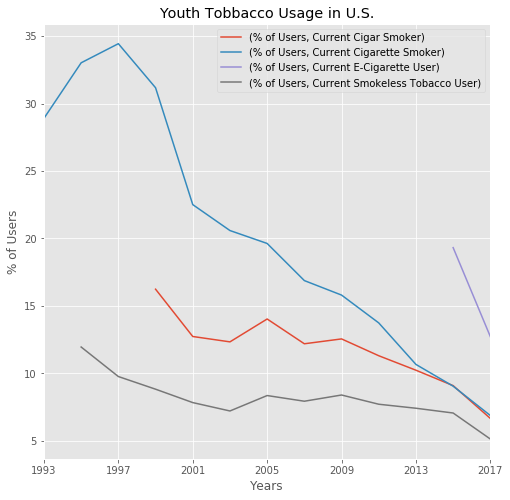

In [118]:
USA[['% of Users']]=USA[['% of Users']].astype(float)
smoking_by_type = USA.groupby(['Year','Frequency']).mean()
fig, ax = plt.subplots(figsize=(8,8))
smoking_by_type.unstack().plot(ax=ax)
plt.title("Youth Tobbacco Usage in U.S.")
plt.xlabel("Years")
plt.ylabel("% of Users")
leg = ax.legend()

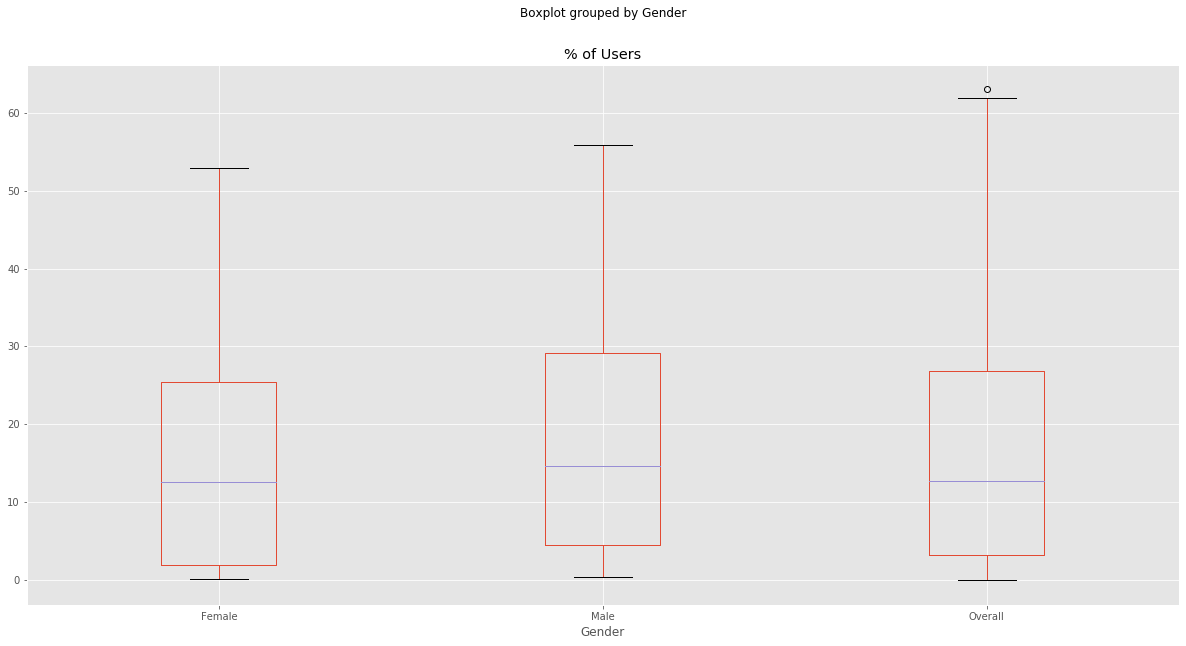

In [119]:
# Create a boxplot to compare means for E-Cig all Usage by Gender all over USA
USA_eCig.boxplot("% of Users", by="Gender", figsize=(20, 10))

In [120]:
# Extract individual groups
group1 = USA_eCig[USA_eCig["Gender"] == "Female"]["% of Users"]
group2 = USA_eCig[USA_eCig["Gender"] == "Male"]["% of Users"]
group3 = USA_eCig[USA_eCig["Gender"] == "Overall"]["% of Users"]


In [121]:
# Perform the ANOVA
#A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=2.3456118386558877, pvalue=0.09604548673887592)

In [122]:
USA_eCig_MF=USA_eCig.loc[(USA_eCig["Gender"] =="Female")|(USA_eCig["Gender"] =="Male")]

USA_eCig_MF

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
979,MD,2015,Maryland,E-Cigarette Use (Youth),User Status,Frequent E-Cigarette User,0.6,12888,Female,All Ages,All Races,Frequent,Middle School,"{'type': 'Point', 'coordinates': [-76.60926011..."
1057,DC,2015,District of Columbia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,6.4,4013,Male,All Ages,All Races,Current,Middle School,"{'type': 'Point', 'coordinates': [-77.03196112..."
1120,TN,2015,Tennessee,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,24.2,1931,Male,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-85.77449091..."
1127,DC,2015,District of Columbia,E-Cigarette Use (Youth),User Status,Frequent E-Cigarette User,0.3,4237,Female,All Ages,All Races,Frequent,Middle School,"{'type': 'Point', 'coordinates': [-77.03196112..."
1133,MD,2015,Maryland,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,37.0,27030,Female,All Ages,All Races,Ever,High School,"{'type': 'Point', 'coordinates': [-76.60926011..."
1170,VT,2015,Vermont,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,7.4,6724,Male,All Ages,All Races,Ever,Middle School,"{'type': 'Point', 'coordinates': [-72.51764079..."
1264,MD,2015,Maryland,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,15.9,12840,Male,All Ages,All Races,Ever,Middle School,"{'type': 'Point', 'coordinates': [-76.60926011..."
1364,WV,2015,West Virginia,E-Cigarette Use (Youth),User Status,Frequent E-Cigarette User,1.0,909,Female,All Ages,All Races,Frequent,Middle School,"{'type': 'Point', 'coordinates': [-80.71264013..."
1592,SD,2015,South Dakota,E-Cigarette Use (Youth),User Status,Frequent E-Cigarette User,1.6,660,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-100.3735306..."
1677,AL,2015,Alabama,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,26.5,786,Male,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-86.63186076..."


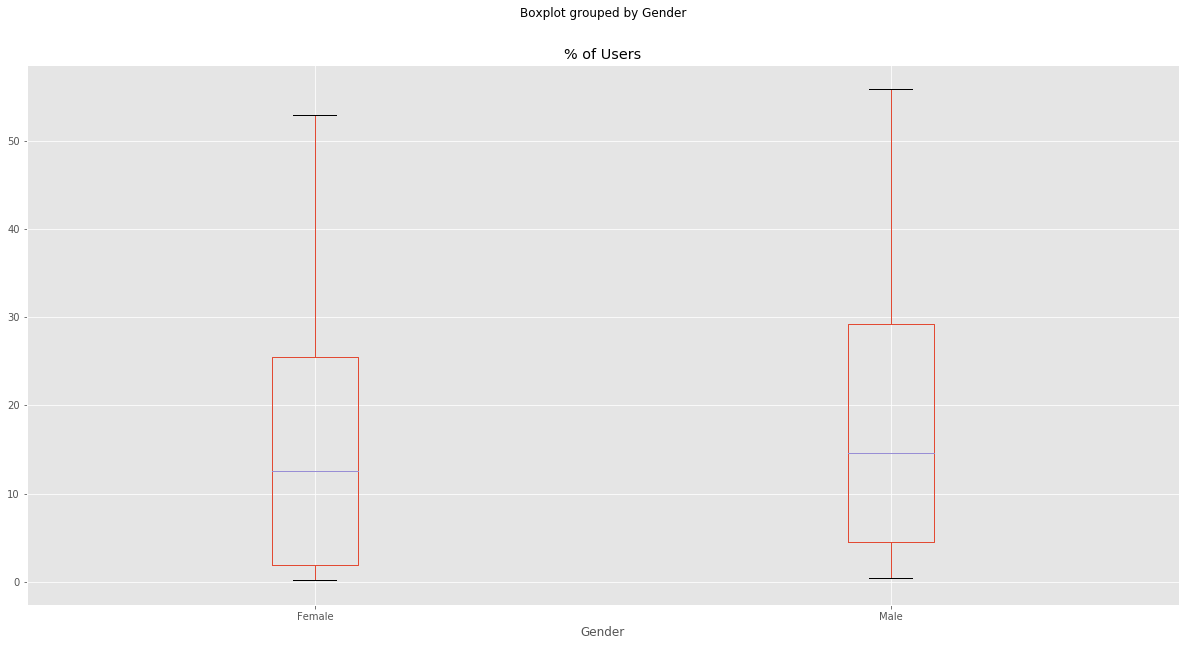

In [123]:
# Create a boxplot to compare means for E-Cig all Usage by Gender all over USA
USA_eCig_MF.boxplot("% of Users", by="Gender", figsize=(20, 10))

In [124]:
# Extract individual groups
group1 = USA_eCig[USA_eCig["Gender"] == "Female"]["% of Users"]
group2 = USA_eCig[USA_eCig["Gender"] == "Male"]["% of Users"]


In [125]:
# Perform the ANOVA
#A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
stats.f_oneway(group1, group2)

F_onewayResult(statistic=4.616410762730868, pvalue=0.032083628905618916)

In [126]:
# Create a boxplot to compare means for E-Cig Usage in 2015 & 2017 all over USA
USA_eCig_2015_17=USA_eCig.loc[(USA_eCig["Year"] =="2017")|(USA_eCig["Year"] =="2015")]

USA_eCig_2015_17.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
41,NC,2015,North Carolina,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,63.0,429,Overall,All Ages,Multiple Race,Ever,High School,"{'type': 'Point', 'coordinates': [-79.15925046..."
61,FL,2015,Florida,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,9.9,5752,Overall,All Ages,All Races,Current,Middle School,"{'type': 'Point', 'coordinates': [-81.92896053..."
89,NY,2015,New York,E-Cigarette Use (Youth),User Status,Frequent E-Cigarette User,4.8,2095,Overall,All Ages,White,Frequent,High School,"{'type': 'Point', 'coordinates': [-75.54397042..."
107,VT,2015,Vermont,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,7.4,362,Overall,All Ages,African American,Ever,Middle School,"{'type': 'Point', 'coordinates': [-72.51764079..."
133,VT,2015,Vermont,E-Cigarette Use (Youth),User Status,Frequent E-Cigarette User,0.8,365,Overall,All Ages,African American,Frequent,Middle School,"{'type': 'Point', 'coordinates': [-72.51764079..."


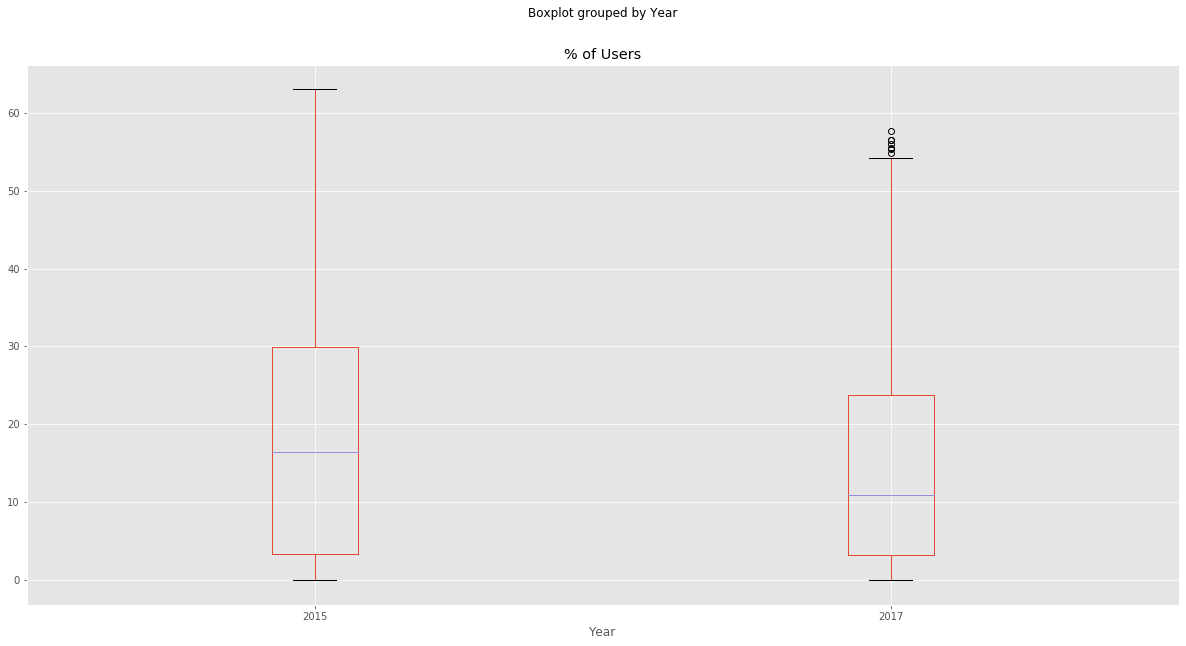

In [127]:
# Extract individual groups
USA_eCig_2015_17.boxplot("% of Users", by="Year", figsize=(20, 10))

In [128]:
# Extract individual groups
group1 = USA_eCig[USA_eCig["Year"] == "2015"]["% of Users"]
group2 = USA_eCig[USA_eCig["Year"] == "2017"]["% of Users"]


In [129]:
# Perform the ANOVA
#A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
stats.f_oneway(group1, group2)

F_onewayResult(statistic=19.592862428443475, pvalue=1.0085446000656468e-05)

In [143]:
USA_eCig_Ethnicity_Minus_All_Races=USA_eCig.loc[USA_eCig["Race"] != "All Races"]
USA_eCig_Ethnicity_Minus_All_Races.head
                                                     

<bound method NDFrame.head of       Location Code  Year                 State                 Use Type  \
41               NC  2015        North Carolina  E-Cigarette Use (Youth)   
89               NY  2015              New York  E-Cigarette Use (Youth)   
107              VT  2015               Vermont  E-Cigarette Use (Youth)   
133              VT  2015               Vermont  E-Cigarette Use (Youth)   
139              MS  2015           Mississippi  E-Cigarette Use (Youth)   
238              ND  2015          North Dakota  E-Cigarette Use (Youth)   
275              WY  2015               Wyoming  E-Cigarette Use (Youth)   
386              VT  2015               Vermont  E-Cigarette Use (Youth)   
387              RI  2015          Rhode Island  E-Cigarette Use (Youth)   
429              FL  2015               Florida  E-Cigarette Use (Youth)   
434              NY  2015              New York  E-Cigarette Use (Youth)   
598              DC  2015  District of Columbia  E-Cigaret

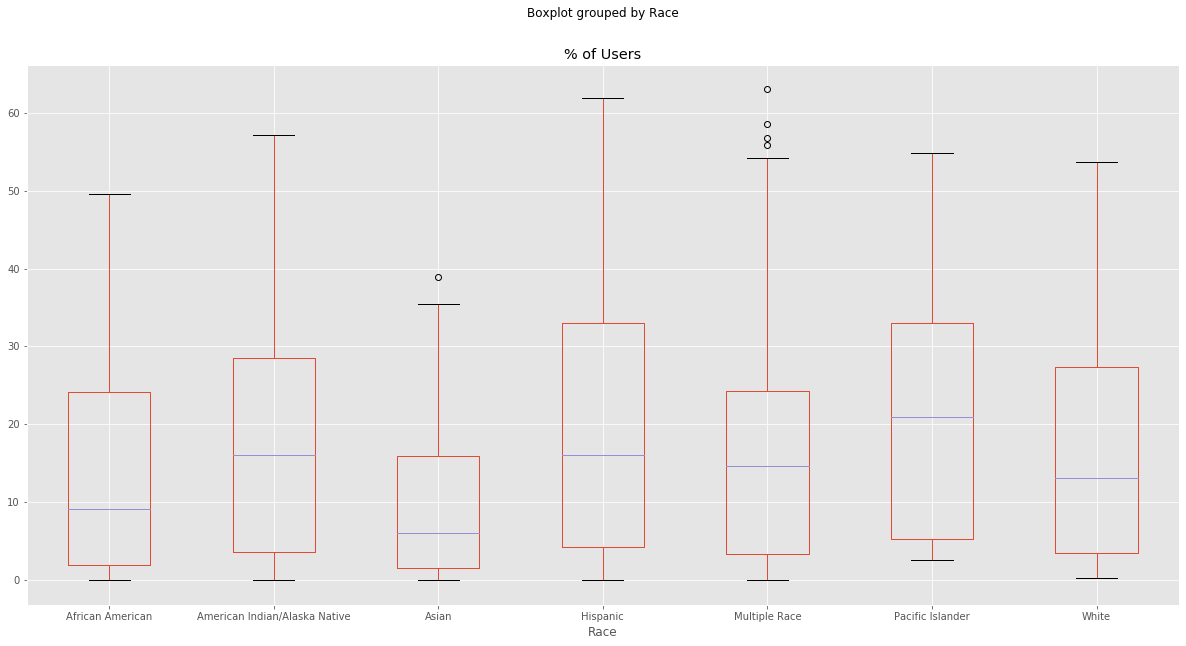

In [138]:
# Extract individual groups
USA_eCig_Ethnicity_Minus_All_Races.boxplot("% of Users", by="Race", figsize=(20, 10))

In [141]:
# Extract individual groups
group1 = USA_eCig_Ethnicity_Minus_All_Races[USA_eCig_Ethnicity_Minus_All_Races["Race"] == "African American"]["% of Users"]
group2 = USA_eCig_Ethnicity_Minus_All_Races[USA_eCig_Ethnicity_Minus_All_Races["Race"] == "American Indian/Alaska Native"]["% of Users"]
group3 = USA_eCig_Ethnicity_Minus_All_Races[USA_eCig_Ethnicity_Minus_All_Races["Race"] == "Asian"]["% of Users"]
group4 = USA_eCig_Ethnicity_Minus_All_Races[USA_eCig_Ethnicity_Minus_All_Races["Race"] == "Hispanic"]["% of Users"]
group5 = USA_eCig_Ethnicity_Minus_All_Races[USA_eCig_Ethnicity_Minus_All_Races["Race"] == "Multiple Race"]["% of Users"]
group6 = USA_eCig_Ethnicity_Minus_All_Races[USA_eCig_Ethnicity_Minus_All_Races["Race"] == "Pacific Islander"]["% of Users"]
group7 = USA_eCig_Ethnicity_Minus_All_Races[USA_eCig_Ethnicity_Minus_All_Races["Race"] == "White"]["% of Users"]


In [142]:
# Perform the ANOVA
#A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
stats.f_oneway(group1, group2,group3,group4,group5,group6,group7)

F_onewayResult(statistic=8.341396710514884, pvalue=7.123927431358914e-09)